<a href="https://colab.research.google.com/github/botadjky/TSFGRIP/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load Data
file_path = 'Iris.csv'
iris_data = pd.read_csv(file_path)

iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


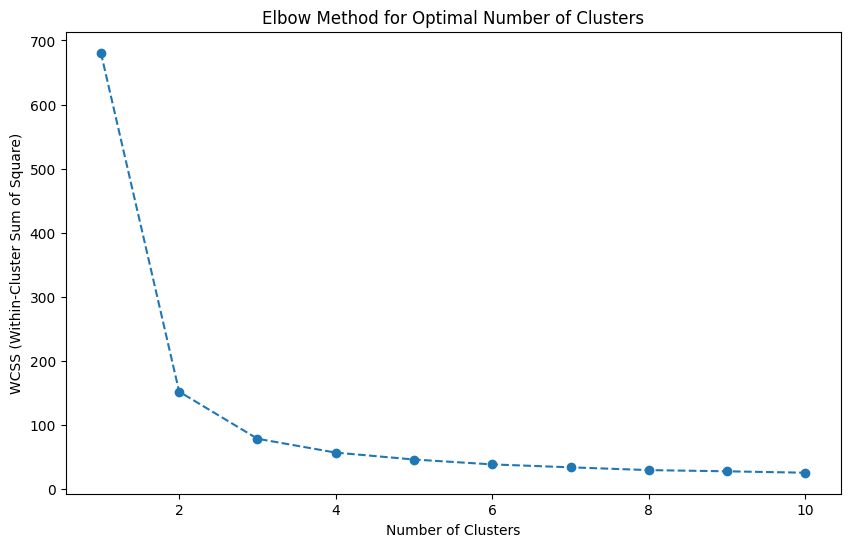

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
X = iris_data.iloc[:, 1:5]  # Use SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

# Determine the optimum number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()


**With the elbow method, it seems that the best cluster number is 3.**

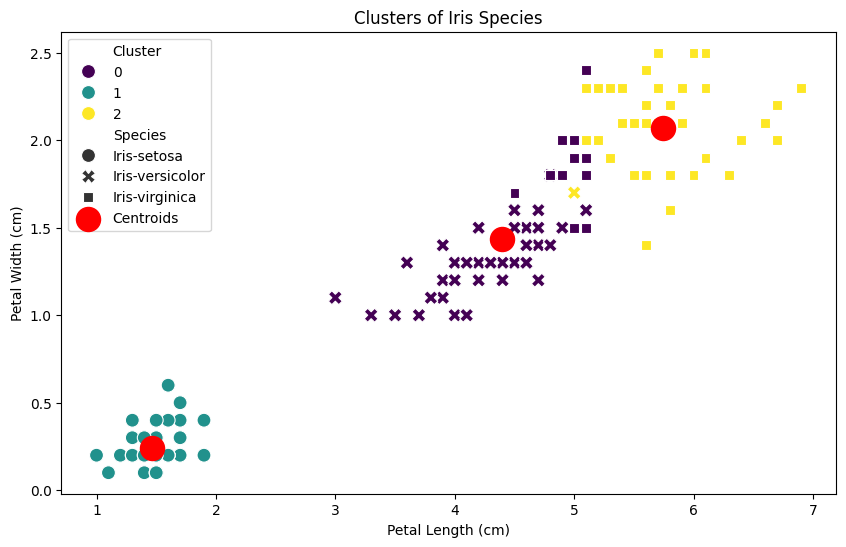

In [3]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

iris_data['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_data['PetalLengthCm'], y=iris_data['PetalWidthCm'], hue=iris_data['Cluster'], palette='viridis', style=iris_data['Species'], s=100)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', label='Centroids')
plt.title('Clusters of Iris Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()
